<H1>IVAN RAYMOND M. AGUIWAS</H1>
<h4>BSIT-3C</h4>


In [1]:
import pandas as pd
import numpy as py
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

DATA FRAME

In [2]:
car = pd.read_csv("uk_accident_data.csv")

In [3]:
car


,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05/06/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02/07/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26/08/2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16/08/2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03/09/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18/02/2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21/02/2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23/02/2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23/02/2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [4]:
car.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,660654.000000,660653.000000,660679.000000,660679.000000
mean,52.553866,-1.431210,1.357040,1.831255
std,1.406922,1.383330,0.824847,0.715269
min,49.914430,-7.516225,1.000000,1.000000
25%,51.490690,-2.332291,1.000000,1.000000
50%,52.315641,-1.411667,1.000000,2.000000
75%,53.453452,-0.232869,1.000000,2.000000
max,60.757544,1.762010,68.000000,32.000000


CHECK ISNULL VALUES

In [5]:
car.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

<h1>FILL UP ISNULL VALUES</h1>

In [6]:
car['Longitude'] = car['Longitude'].fillna(car['Longitude'].mean())
car['Latitude'] = car['Latitude'].fillna(car['Longitude'].mean())
car['Road_Surface_Conditions'] = car['Road_Surface_Conditions'].fillna('Dry')
car['Road_Type'] = car['Road_Type'].fillna('Single Carriageway')
car['Urban_or_Rural_Area'] = car['Urban_or_Rural_Area'].fillna('Urban')
car['Weather_Conditions'] = car['Weather_Conditions'].fillna('Fine')


In [7]:
car.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

CHANGING DATA TYPES


In [8]:
car.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

In [9]:
car['Accident_Severity'] = car ['Accident_Severity'].astype("category")
car['Light_Conditions'] = car ['Light_Conditions'].astype("category")
car['District Area'] = car ['District Area'].astype("category")
car['Road_Surface_Conditions'] = car ['Road_Surface_Conditions'].astype("category")
car['Road_Type'] = car ['Road_Type'].astype("category")
car['Urban_or_Rural_Area'] = car ['Urban_or_Rural_Area'].astype("category")
car['Weather_Conditions'] = car ['Weather_Conditions'].astype("category")
car['Vehicle_Type'] = car ['Vehicle_Type'].astype("category")
car['Accident Date'] = pd.to_datetime(car['Accident Date'], dayfirst = True, errors = "coerce")

<h1>EXTRACT DATE INFO</h1>

In [10]:
car['Year'] = car ['Accident Date'].dt.year
car['Month'] = car ['Accident Date'].dt.month
car['Day'] = car ['Accident Date'].dt.day
car['Days of Week'] = car ['Accident Date'].dt.dayofweek
car['Days of Week'] = car ['Accident Date'].dt.day_name()

In [11]:
car.dtypes

Index                              object
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                 category
District Area                    category
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
Year                                int32
Month                               int32
Day                                 int32
Days of Week                       object
dtype: object

<h1>QUESTIONS</h1>

<h3>1. Is there a correlation between number of vehicles and number of casualties?</h3>

In [12]:
vehicle_casualties_corr = car['Number_of_Vehicles'].corr(car['Number_of_Casualties'])

In [13]:
vehicle_casualties_corr

np.float64(0.22888886126927557)

<h2>Insight No. 1</h2>
<h4>The correlation between Number of Vehicles and Number of Casualties is 0.23. This means that accidents involving more vehicles tend to have slightly more casualties, but the relationship is weak. </h4>
<hr>

<h3>2. Does accident severity correlate with the number of casualties?</h3>

In [14]:
severity_map = {'Slight': 1, 'Serious': 2, 'Fatal': 3}
car['Accident_Severity_Num'] = car['Accident_Severity'].map(severity_map)
severity_casualties_corr = car['Accident_Severity_Num'].corr(car['Number_of_Casualties'])

In [15]:
severity_casualties_corr

np.float64(0.08788637762883476)

<h2>Insight No. 2</h2>
<h4>As you can see, the result is "0.08788637762883476," meaning there is NO correlation between Severity and the Number of Casualties </h4>
<hr>

<h3>3. Is there a correlation between latitude and number of casualties (accident location vs. casualties)?</h3>

In [16]:
lat_casualties_corr = car['Latitude'].corr(car['Number_of_Casualties'])

In [17]:
lat_casualties_corr

np.float64(0.031677083264069886)

<h2>Insight No. 3</h2>
<h4>The correlation between latitude and number of casualties is 0.032. This value is very close to zero, which means there is essentially no linear relationship between accident location (latitude) and the number of casualties.</h4>
<hr>

<h3>4. What is the correlation between longitude and accident severity (encoded numerically)?
</h3>

In [18]:
severity_map = {'Slight': 1, 'Serious': 2, 'Fatal': 3}
car['Accident_Severity_Num'] = car['Accident_Severity'].map(severity_map)
long_severity_corr = car['Longitude'].corr(car['Accident_Severity_Num'])

In [19]:
long_severity_corr

np.float64(-0.004379430003664336)

<h2>Insight No. 4</h2>
<h4>As you can see, the result is "-0.004379430003664336," meaning there is NO correlation between Longtitude and the Accident Severity</h4>
<hr>

<H3>5. What is the average number of vehicles per Light_Condition?</H3>

In [20]:
avg_vehicles_per_light = car.groupby('Light_Conditions')['Number_of_Vehicles'].mean().sort_values(ascending=True)

In [21]:
avg_vehicles_per_light

Light_Conditions
Darkness - no lighting         1.599781
Darkness - lights unlit        1.752654
Darkness - lighting unknown    1.758482
Darkness - lights lit          1.775498
Daylight                       1.865385
Name: Number_of_Vehicles, dtype: float64

<h2>Insight No. 5</h2>
<h4>As you can see, Daylight has the highest average of accident.</h4>
<hr>

<h2>Insight No. 6</h2>
<h3>Darkness – no lighting has the lowest average number of vehicles involved.</h3>
<hr>

<H3>6. Which District Area has the highest mean number of casualties?</H3>

In [22]:
car['District Area'].value_counts()

District Area
Birmingham            13491
Leeds                  8898
Manchester             6720
Bradford               6212
Sheffield              5710
                      ...  
Berwick-upon-Tweed      153
Teesdale                142
Shetland Islands        133
Orkney Islands          117
Clackmannanshire         91
Name: count, Length: 422, dtype: int64

In [23]:
avg_casualties_by_district = car.groupby('District Area')['Number_of_Casualties'].mean()
highest_district = avg_casualties_by_district.idxmax()

In [24]:
highest_district

'Blaeu Gwent'

<h2>Insight No. 7</h2>
<h4>As you can see, among all the district area ,Blaeu Gwent has the highest number of casualties </h4>
<hr>

<h3>7. Which District Area has the highest mean number of casualties? </h3>

In [25]:
avg_casualties_by_district = car.groupby('District Area')['Number_of_Casualties'].mean()

In [26]:
avg_casualties_by_district

District Area
Aberdeen City    1.139834
Aberdeenshire    1.310363
Adur             1.319871
Allerdale        1.474291
Alnwick          1.512931
                   ...   
Wychavon         1.427627
Wycombe          1.412377
Wyre             1.378029
Wyre Forest      1.382869
York             1.293094
Name: Number_of_Casualties, Length: 422, dtype: float64

In [27]:
highest_district = avg_casualties_by_district.idxmax()
highest_value = avg_casualties_by_district.max()

In [28]:
print(f"\nDistrict Area with highest mean number of casualties: {highest_district} ({highest_value:.2f} casualties per accident)")



District Area with highest mean number of casualties: Blaeu Gwent (1.69 casualties per accident)


<h2>Insight No. 8</h2>
<h4>Among all district areas, Blaeu Gwent has the highest average number of casualties per accident at 1.69.</h4>
<hr>

<h3>8. Which Weather_Conditions are associated with the highest average number of casualties?</h3>

In [29]:
avg_casualties_by_weather = car.groupby('Weather_Conditions')['Number_of_Casualties'].mean()
highest_weather = avg_casualties_by_weather.idxmax()


In [30]:
highest_weather

'Fog or mist'

<h2>Insight No. 9</h2>
<h4>As you can see, the weather conditions that has the highest average of casualties is Fog or Mist</h4>
<hr>

<h3>9. Which Vehicle_Type is most frequently involved in accidents with high severity?</h3>

In [31]:
high_severity = car[car['Accident_Severity'].isin(['Serious', 'Fatal'])]
high_severity

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,Days of Week,Accident_Severity_Num
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,6,5,Wednesday,2
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019,7,2,Tuesday,2
2,200701BS66127,Serious,2019-08-26,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,Single Carriageway,Urban,Fine,Taxi/Private hire car,2019,8,26,Monday,2
3,200701BS66128,Serious,2019-08-16,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019,8,16,Friday,2
5,200701BS67159,Serious,2019-09-18,51.497750,Daylight,Kensington and Chelsea,-0.192556,2,3,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,9,18,Wednesday,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660629,201091NL00686,Serious,2022-02-11,57.687933,Daylight,Shetland Islands,-4.176860,1,2,Dry,Single carriageway,Rural,Fine + high winds,Car,2022,2,11,Friday,2
660645,201091NL05842,Serious,2022-10-18,60.162660,Daylight,Shetland Islands,-1.165232,1,1,Dry,Single carriageway,Rural,Fine + high winds,Car,2022,10,18,Tuesday,2
660672,201091NM01085,Serious,2022-01-29,57.170725,Daylight,Highland,-3.852421,1,2,Snow,Single carriageway,Rural,Fine no high winds,Car,2022,1,29,Saturday,2
660677,201091NM01964,Serious,2022-02-23,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc,2022,2,23,Wednesday,2


In [32]:
vehicle_counts = high_severity['Vehicle_Type'].value_counts()
vehicle_counts

Vehicle_Type
Car                                      73038
Van / Goods 3.5 tonnes mgw or under       5021
Motorcycle over 500cc                     3796
Bus or coach (17 or more pass seats)      3698
Goods 7.5 tonnes mgw and over             2537
Motorcycle 125cc and under                2220
Taxi/Private hire car                     1926
Motorcycle over 125cc and up to 500cc     1119
Motorcycle 50cc and under                 1109
Goods over 3.5t. and under 7.5t            924
Other vehicle                              837
Minibus (8 - 16 passenger seats)           305
Agricultural vehicle                       303
Pedal cycle                                 45
Data missing or out of range                 0
Ridden horse                                 0
Name: count, dtype: int64

In [33]:
top_vehicle_type = vehicle_counts.idxmax()
top_vehicle_count = vehicle_counts.max()

print(f"\nMost frequently involved vehicle type in high severity accidents: {top_vehicle_type} ({top_vehicle_count} accidents)")


Most frequently involved vehicle type in high severity accidents: Car (73038 accidents)


<h2>Insight No. 10</h2>
<h4>The result shows that 75.39% of vehicle types are cars, which have the highest percentage of involvement in high severity accident. </h4>
<hr>

<h2>Insight No. 11</h2>
<h4>The result shows that all engine types of motorcycles (including over 500cc, 125cc and over, 50cc–125cc, and 50cc and under) are substantial, meaning they are more or less comparable to cars only. </h4>
<hr>

<h3>10. What is the average number of casualties per Urban_or_Rural_Area?</h3>

In [34]:
avg_casualties_per_area = car.groupby('Urban_or_Rural_Area')['Number_of_Casualties'].mean()
avg_casualties_per_area

Urban_or_Rural_Area
Rural          1.479204
Unallocated    1.181818
Urban          1.287807
Name: Number_of_Casualties, dtype: float64

<h2>Insight No. 12</h2>
<h4>As you can see, the average casualties in Rural is 1.479204 more higher than Urban and in Unallocated </h4>
<hr>

<h3>11. Which month has the highest number of accidents?</h3>

In [35]:
accidents_by_month = car['Month'].value_counts()

In [36]:
highest_month = accidents_by_month.idxmax()
highest_value = accidents_by_month.max()
print(f"Month with highest number of accidents: {highest_month} ({highest_value} accidents)")

Month with highest number of accidents: 11 (60424 accidents)


<h2>Insight No. 13</h2>
<h4>The result shows that the month with the highest number of accidents is November with 60424 accidents. </h4>
<hr>

<h3>12. Which weather condition has the most common fatal accidents?</h3>

In [37]:
fatal_accidents = car[car['Accident_Severity'] == 'Fatal']

In [38]:
fatal_accidents

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,Days of Week,Accident_Severity_Num
7,200701BS67370,Fatal,2019-10-03,51.482260,Darkness - lights lit,Kensington and Chelsea,-0.179486,3,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,10,3,Thursday,3
11,200701BS67747,Fatal,2019-11-02,51.499127,Daylight,Kensington and Chelsea,-0.159652,1,2,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019,11,2,Saturday,3
20,200701BS68301,Fatal,2019-10-24,51.505996,Daylight,Kensington and Chelsea,-0.214277,1,1,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,10,24,Thursday,3
21,200701BS68302,Fatal,2019-11-24,51.486795,Daylight,Kensington and Chelsea,-0.170375,5,1,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,11,24,Sunday,3
717,200701CP00032,Fatal,2019-01-30,51.510978,Daylight,City of London,-0.107581,1,2,Wet or damp,Dual carriageway,Urban,Fine no high winds,Car,2019,1,30,Wednesday,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660470,201091NH00529,Fatal,2022-01-29,58.475726,Daylight,Western Isles,-6.278583,1,1,Wet or damp,Single carriageway,Rural,Fine + high winds,Car,2022,1,29,Saturday,3
660519,201091NJ01533,Fatal,2022-02-02,58.495554,Daylight,Highland,-4.451628,1,1,Snow,Single carriageway,Rural,Snowing no high winds,Car,2022,2,2,Wednesday,3
660565,201091NJ11329,Fatal,2022-08-15,57.871514,Daylight,Highland,-4.243081,1,1,Dry,Single carriageway,Rural,Fine no high winds,Goods 7.5 tonnes mgw and over,2022,8,15,Monday,3
660581,201091NJ14695,Fatal,2022-10-21,58.445475,Darkness - lights lit,Highland,-3.065535,1,1,Wet or damp,Single carriageway,Rural,Fine no high winds,Car,2022,10,21,Friday,3


In [39]:
fatal_weather_counts = fatal_accidents['Weather_Conditions'].value_counts()

In [40]:
most_common_weather = fatal_weather_counts.idxmax()
most_common_count = fatal_weather_counts.max()

print(f"The most common Weather_Condition for fatal accidents is '{most_common_weather}' "
      f"({most_common_count} accidents).")

The most common Weather_Condition for fatal accidents is 'Fine no high winds' (7100 accidents).


<h2>Insight No. 14</h2>
<h3>The weather condition with the most fatal accident is Fine no High Winds with 7100 accidents.</h3>

<h3>13. What is the most common Day_of_Week for accidents?</h3>

In [41]:
most_common_day = car['Days of Week'].value_counts().idxmax()
count = car['Days of Week'].value_counts().max()

print(f"The most common Days of Week for accidents is {most_common_day} ({count} accidents).")

The most common Days of Week for accidents is Saturday (107178 accidents).


<h2>Insight No. 15</h2>
<h3>The days of the week with the most accident is Saturday. Maybe, because it is weekends and many people usually have a free time to go somewehere.</h3>
<hr>

<h3>14. What is the total number of accident in the dataset?</h3>

In [42]:
total_accidents = len(car)

print(f"Total number of accidents recorded in the dataset: {total_accidents}")

Total number of accidents recorded in the dataset: 660679


<h2>Insight No. 16</h2>
<h3>In our dataset, we have a total of 660679 total accidents.</h3>
<hr>

<h3>15. How many accidents occurred in Urban vs Rural areas?</h3>

In [43]:
accidents_by_area = car['Urban_or_Rural_Area'].value_counts()


In [44]:
accidents_by_area

Urban_or_Rural_Area
Urban          421678
Rural          238990
Unallocated        11
Name: count, dtype: int64

<h2>Insight No. 17</h2>
<h3>The result shows that most of accident happened in Urban with the total of 421678 accidents</h3>
<hr>

<h2>Insight No. 18</h2>
<h3>On the other hand, Rural area has 238990 or 36.1734 % of the total accidents.</h3>
<hr>

<h2>16. What is the distribution of Accident_Severity (fatal, serious, slight)?</h2>

In [45]:
severity_counts = car['Accident_Severity'].value_counts()

In [46]:
severity_counts

Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64

<h2>Insight No. 19</h2>
<h3>The most accident severity in our dataset is Slight with 563801 or 85.32 % of total accidents. </h3>
<hr></hr>

<h2>Insight No. 20</h2>
<h3>The result shows that deadly of fatal accidents has the small chance compared to Slight and Serious accidents.</h3>
<hr></hr>

<h3>17. Which month has the highest number of accidents involving motorcycles?</h3>

In [47]:
motorcycle_accidents = car[car['Vehicle_Type'].str.contains('Motorcycle', case=False, na=False)]

In [48]:
motorcycle_by_month = motorcycle_accidents['Month'].value_counts()

In [49]:
highest_month = motorcycle_by_month.idxmax()
highest_value = motorcycle_by_month.max()

In [50]:
print(f"The month with the highest number of motorcycle accidents is: {highest_month} ({highest_value} accidents)")

The month with the highest number of motorcycle accidents is: 10 (5134 accidents)


<h2>Insight No. 21</h2>
<h3>October has the highest number of motorcylce accident with 5134 accidents.</h3>
<hr></hr>

<h3>17. What district are has the highest amount of fatality?</h3>

In [51]:
fatal_by_district = (car[car['Accident_Severity'] == 'Fatal']
    .groupby('District Area')
    .size()
    .sort_values(ascending=False)
)


In [52]:
fatal_by_district

District Area
Birmingham                  105
Leeds                        93
Highland                     88
East Riding of Yorkshire     85
Bradford                     71
                           ... 
Orkney Islands                2
Havant                        2
Stevenage                     1
Clackmannanshire              1
Harlow                        1
Length: 422, dtype: int64

<h2>Insight No. 22</h2>
<h3>The result shows that the district with the highest amount of fatal severity is Birmingham. On the other hand, Havant, Clackmannanshire and Harlow are the district with the lowest fatality with only 1.  </h3>
<hr></hr>

<h3>18. What year has the highest amount of accident?</h3>

In [53]:
accidents_per_year = car.groupby('Year').size()

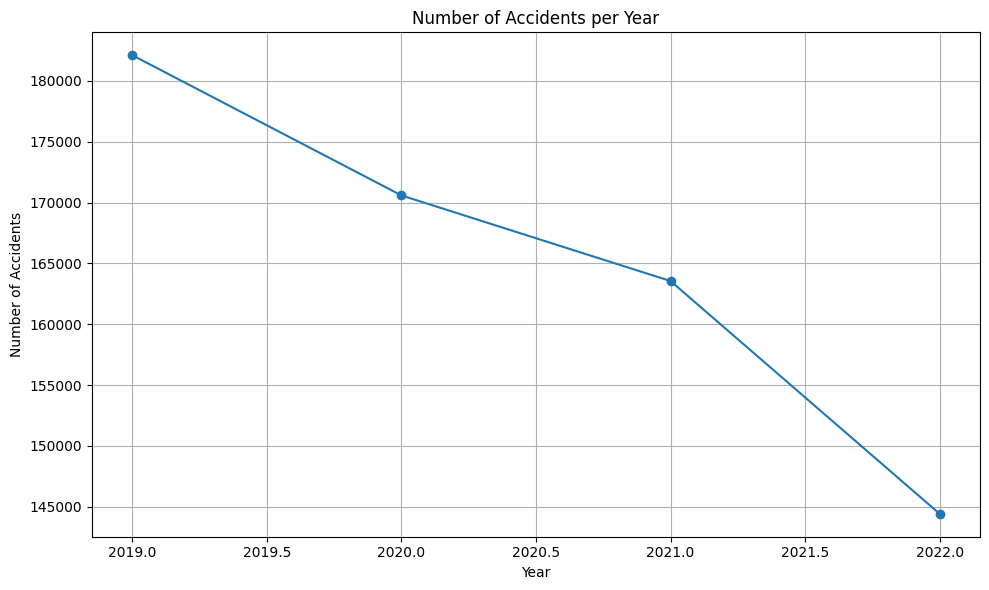

In [54]:
plt.figure(figsize=(10,6))
plt.plot(accidents_per_year.index, accidents_per_year.values, marker='o', linestyle='-')

plt.title('Number of Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.tight_layout()
plt.show()

<h2>Insight No. 23</h2>
<h3>The result shows the declined amount of accident every year start from 2019 it shows slowly declined in every year. </h3>
<hr></hr>

<h3> 19. Show the Fatal Accident in every year.</h3>

In [55]:
fatal_accidents = car[car['Accident_Severity'] == 'Fatal']

In [56]:
fatal_per_year = fatal_accidents.groupby('Year').size()

In [57]:
fatal_per_year

Year
2019    2714
2020    2341
2021    2057
2022    1549
dtype: int64

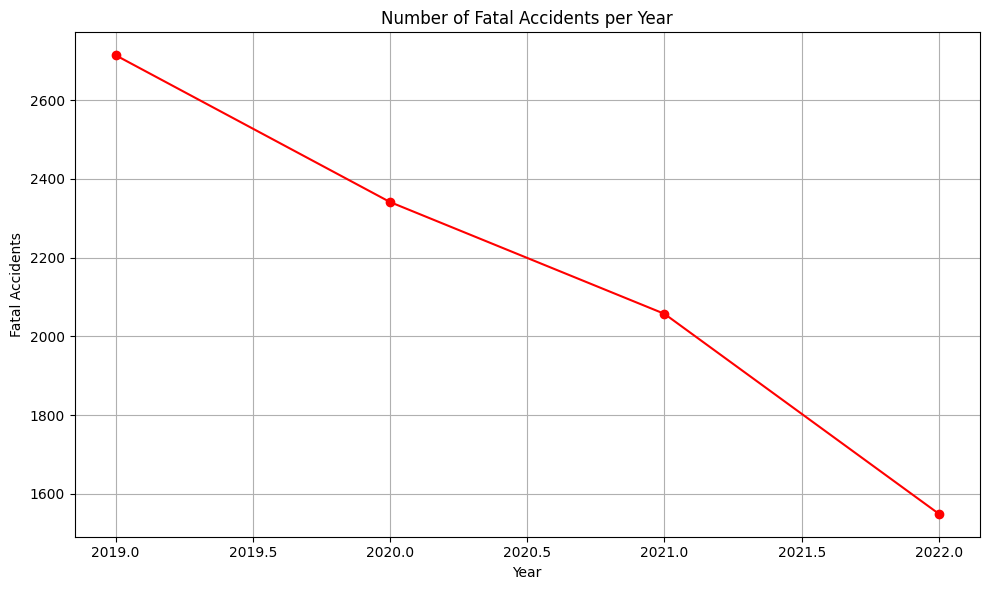

In [58]:
plt.figure(figsize=(10,6))
plt.plot(fatal_per_year.index, fatal_per_year.values, marker='o', color='red', linestyle='-')

plt.title('Number of Fatal Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Fatal Accidents')
plt.grid(True)
plt.tight_layout()
plt.show()

<h2>Insight No. 24</h2>
<h3>The result shows that, also 2019 has the highest fatal accident, but it slowly going down in every year until 2022 </h3>
<hr></hr>

In [59]:
car

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,Days of Week,Accident_Severity_Num
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,6,5,Wednesday,2
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019,7,2,Tuesday,2
2,200701BS66127,Serious,2019-08-26,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,Single Carriageway,Urban,Fine,Taxi/Private hire car,2019,8,26,Monday,2
3,200701BS66128,Serious,2019-08-16,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019,8,16,Friday,2
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,Single Carriageway,Urban,Fine,Other vehicle,2019,9,3,Tuesday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,2022-02-18,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car,2022,2,18,Friday,1
660675,201091NM01881,Slight,2022-02-21,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,2,21,Monday,1
660676,201091NM01935,Slight,2022-02-23,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,2,23,Wednesday,1
660677,201091NM01964,Serious,2022-02-23,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc,2022,2,23,Wednesday,2


<h3>20. On what Road Condition has the accident both Rural and Urban?  </h3>

In [60]:
road_area_counts = (
    car.groupby(['Road_Surface_Conditions', 'Urban_or_Rural_Area'])
       .size()
       .unstack(fill_value=0)
)


In [61]:
road_area_counts

Urban_or_Rural_Area,Rural,Unallocated,Urban
Road_Surface_Conditions,,,
Dry,145145,5,303397
Flood over 3cm. deep,785,1,231
Frost or ice,10953,0,7564
Snow,3102,0,2788
Wet or damp,79005,5,107698


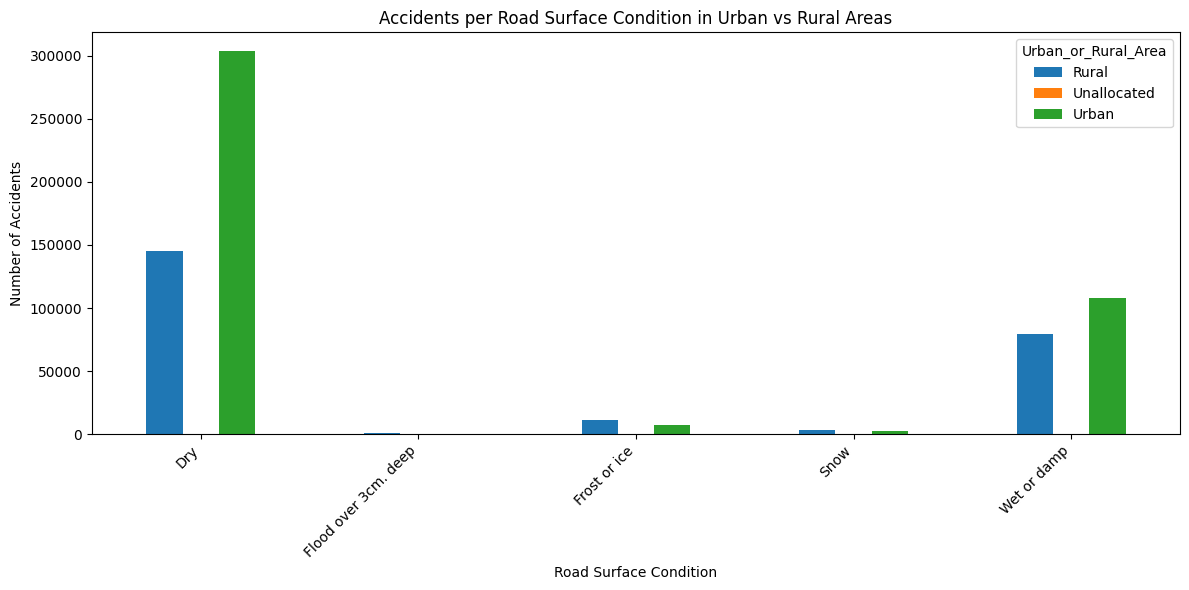

In [62]:

road_area_counts = (
    car.groupby(['Road_Surface_Conditions', 'Urban_or_Rural_Area'])
       .size()
       .unstack(fill_value=0)
)
road_area_counts.plot(kind='bar', figsize=(12,6))

plt.title('Accidents per Road Surface Condition in Urban vs Rural Areas')
plt.xlabel('Road Surface Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<h2>Insight No. 25</h2>
<h3>The result shows that the Road Surface with the highest amount of accident in Rural is dry. On the other hand, In urban it still dry. And floow over 3CM deep are both with the lowest accident both Rural and Urban </h3>
<hr></hr>